# **Red White Wine Quality**:

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import data
wine = pd.read_csv("/content/wine_dataset.csv")

In [ ]:
# view data
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
# info of data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
# summary statistics
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# check for missing values
wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [ ]:
# check for categories
wine.nunique()

fixed_acidity           106
volatile_acidity        187
citric_acid              89
residual_sugar          316
chlorides               214
free_sulfur_dioxide     135
total_sulfur_dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
style                     2
dtype: int64

In [ ]:
# correlation
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


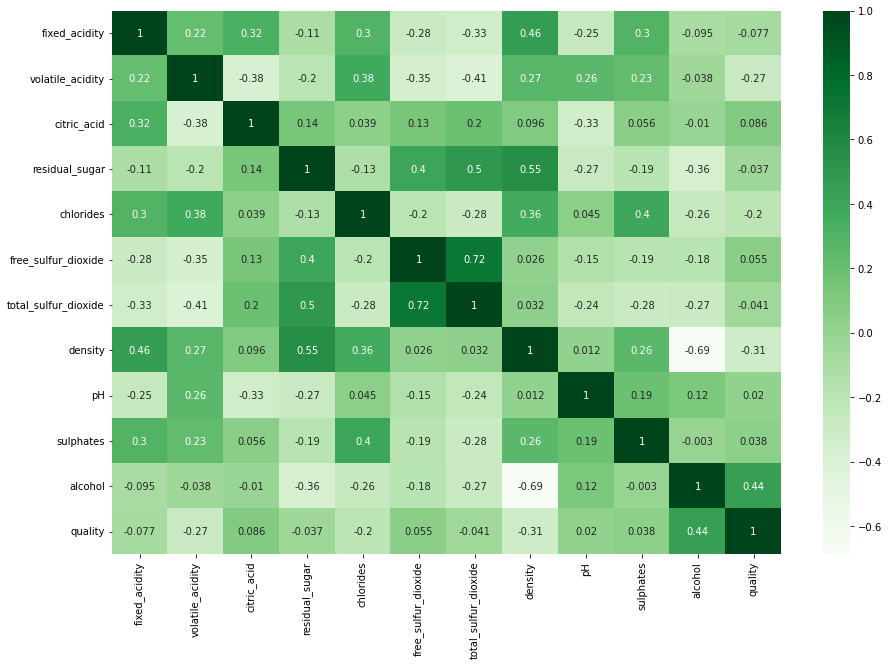

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(wine.corr(), cmap = "Greens", annot = True)

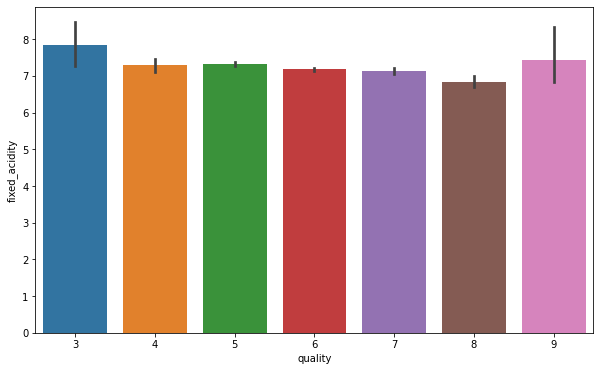

In [ ]:
# visualize pairplot
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = wine)

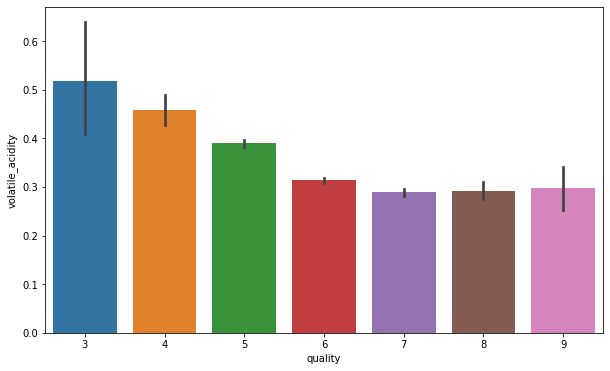

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = wine)

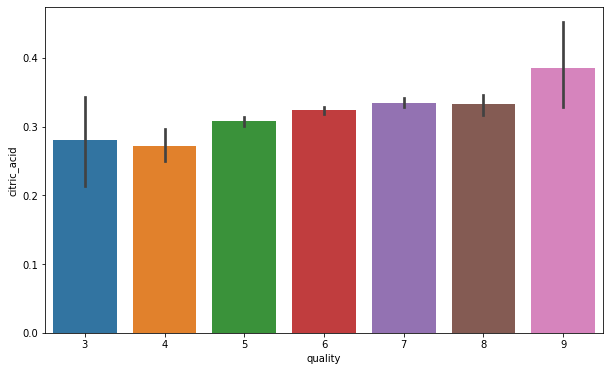

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = wine)

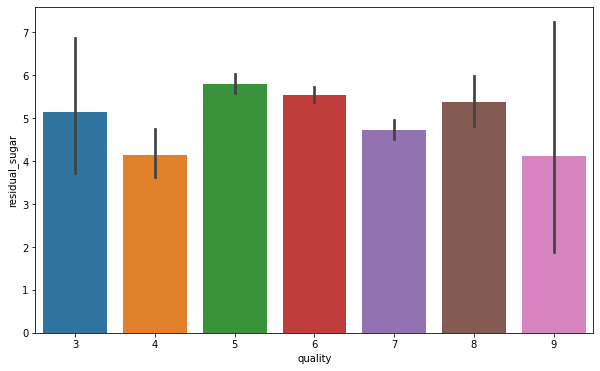

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = wine)

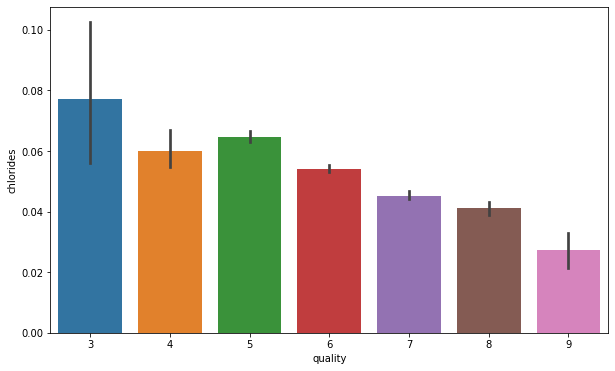

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

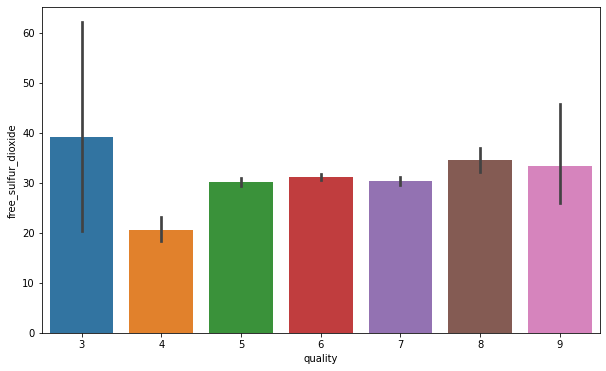

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free_sulfur_dioxide', data = wine)

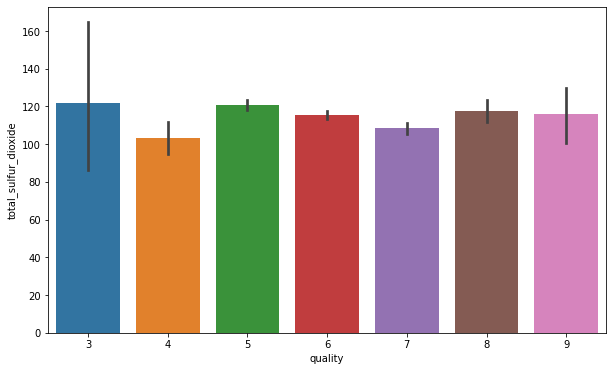

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total_sulfur_dioxide', data = wine)

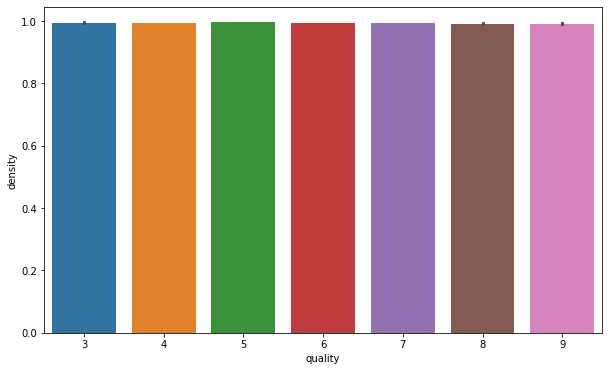

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = wine)

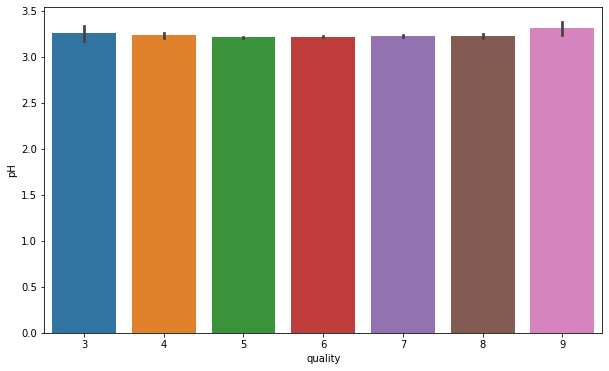

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine)

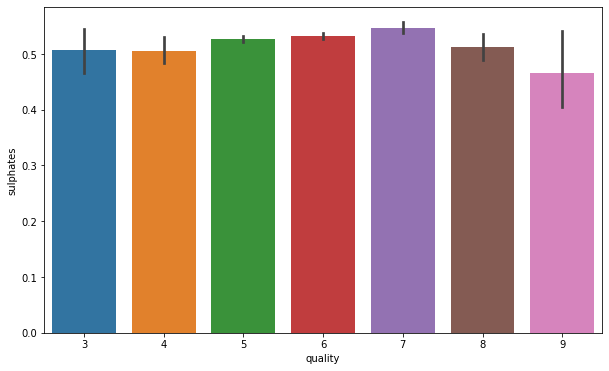

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

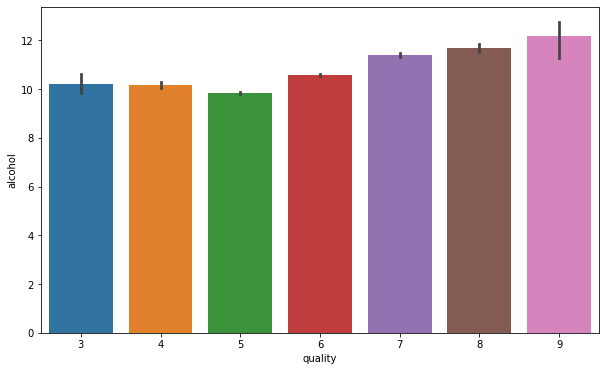

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

<function matplotlib.pyplot.show(*args, **kw)>

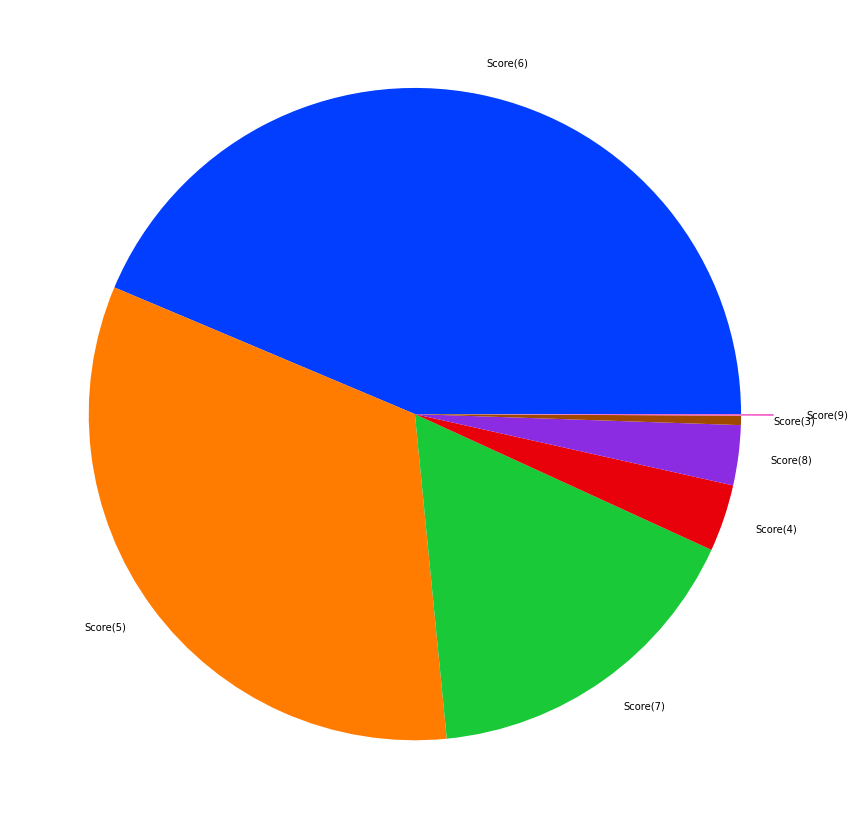

In [ ]:
# Quality score distribution
x = wine['quality'].value_counts()
labels = ['Score(6)','Score(5)','Score(7)','Score(4)','Score(8)','Score(3)','Score(9)']
colors = sns.color_palette('bright')[0:7]
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1)
fig, ax = plt.subplots(figsize = (15,15))
ax.pie(x, labels = labels, explode = explode, colors = colors)
plt.show

In [ ]:
# Classification of target variable
wine['goodquality'] = [1 if x >=6 else 0 for x in wine['quality']] 

<function matplotlib.pyplot.show(*args, **kw)>

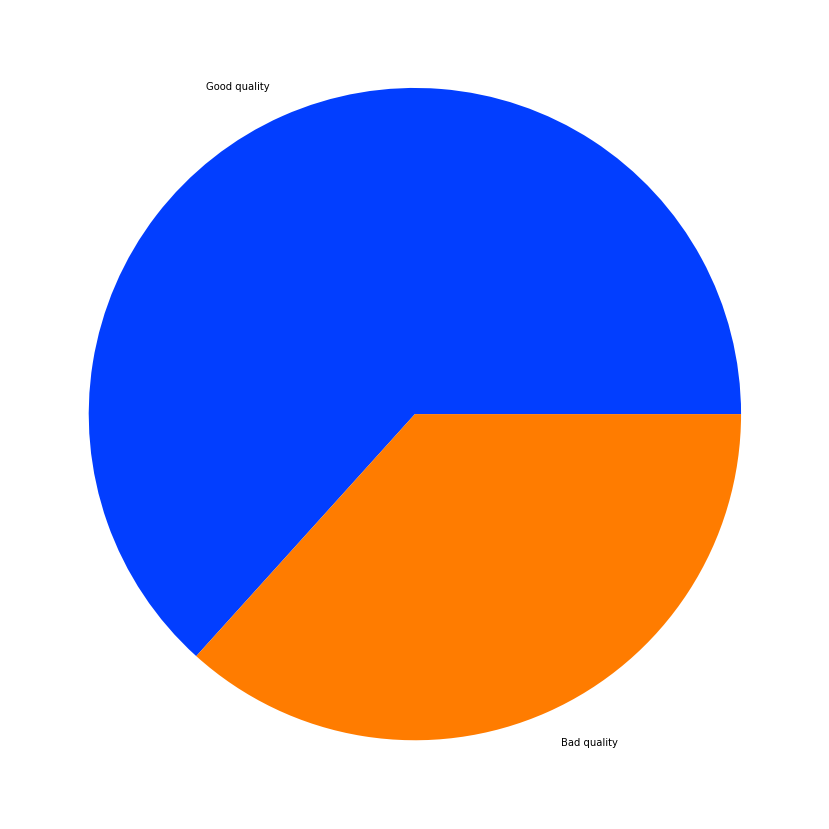

In [ ]:
# Quality score distribution after adding goodquality
x = wine['goodquality'].value_counts()
labels = ['Good quality', 'Bad quality']
colors = sns.color_palette('bright')[0:2]
fig, ax = plt.subplots(figsize = (15,15))
ax.pie(x, labels = labels, colors = colors)
plt.show

In [ ]:
# column names
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style', 'goodquality'],
      dtype='object')

In [ ]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
wine.goodquality.value_counts()

1    4113
0    2384
Name: goodquality, dtype: int64

In [ ]:
# define y
y = wine['goodquality']

In [ ]:
# define X
X = wine.drop(['goodquality','quality','style'], axis = 1)

In [ ]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 2529)

In [ ]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 11), (1625, 11), (4872,), (1625,))

In [ ]:
# select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
# train_model
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predict with model
y_pred = model.predict(X_test)

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# model accuracy
accuracy_score(y_test, y_pred)

0.8221538461538461

In [ ]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[424, 166],
       [123, 912]])

In [ ]:
# model classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       590
           1       0.85      0.88      0.86      1035

    accuracy                           0.82      1625
   macro avg       0.81      0.80      0.80      1625
weighted avg       0.82      0.82      0.82      1625



In [ ]:
# future prediction
sample = wine.sample()
sample

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style,goodquality
2618,8.3,0.14,0.26,1.5,0.049,56.0,189.0,0.9946,3.21,0.62,9.5,6,white,1


In [ ]:
# define X_new
X_new = sample.loc[:, X.columns]
X_new

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2618,8.3,0.14,0.26,1.5,0.049,56.0,189.0,0.9946,3.21,0.62,9.5


In [ ]:
# predict for X_new
print(model.predict(X_new))

[1]
